This colab notebook presents the code for making a medical assistant which will predict -
1. If a person has heart disease or not based on their test reports comprising of their age, sex, chest pain type(cp), resting blood pressure(trestbps), cholestrol(chol), fasting blood sugar(fbs), resting ecg results(restecg), maximum heart rate achieved(thalach), exercise-induced angina(exang), ST depression induced by exercise relative to rest(oldpeak), Slope of peak exercise ST segment(slope), Number of major vessels coloured by Fluoroscopy(ca) and Thalassemia(thal).
These features collectively help to determine if a patient has heart disease or not. Using SVMs and neural network, I will train the dataset and then use it to predict if a new patient with a test report has a heart disease or not.
This classification is useful as it helps to predict the likelihood of diseases, allowing easy early detection by doctors. It can also help in more efficient resource allocation by hospitals to patients who need more urgent critical care if the likelihood of them having a life threatening disease is higher.  
2. If a person has chronic kidney disease or not based on test factors like (these are the features of the dataset) - blood pressure, specific gravity, albumin, rbc, sugar, pus cells, pus cells clumps, bacteria, blood glucose random, blood urea, serum creatinine, sodium, potassium, haemoglobin, packed cell volume, white blood cells, rbc count, hypertension, diabetes mellitus, coronary artery disease, appetite, peda edema and anaemia.
Training a ML model on all these features help us to determine if a patient has CKD or not. After this model has been trained, we can use it on any patients test data and determine his/her health condition.
This classification is useful as Chronic kidney disease (CKD) is a dangerous ailment that can last a person's entire life and is caused by either kidney malignancy or decreased kidney functioning. It is feasible to halt or slow the progression of this chronic disease to an end-stage wherein dialysis or surgical intervention is the only method to preserve a patient’s life. Earlier detection and appropriate therapy can increase the likelihood of this happening.

# **Heart Disease Detection**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data from the file
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)

**Data Preprocessing and Analysis**

In [3]:
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [5]:
row, col = data.shape
print(row, col)

1025 14


In [6]:
print(data.describe)

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

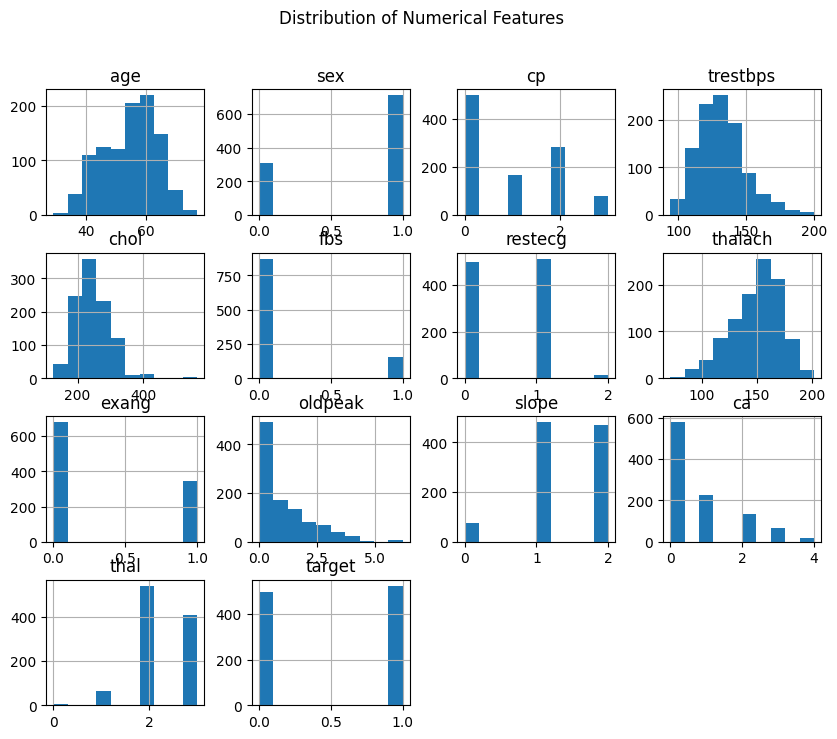

In [7]:
# separate categorical and numerical cols
categorical_cols = data.select_dtypes(include = ['object']).columns
numerical_cols = data.select_dtypes(include = [np.number]).columns
# Frequency count for categorical columns
for column in categorical_cols:
    print(f'Value counts for {column}:\n', data[column].value_counts())
    print('\n')

# Histograms for numerical columns
data[numerical_cols].hist(figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [8]:
# checking the null values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


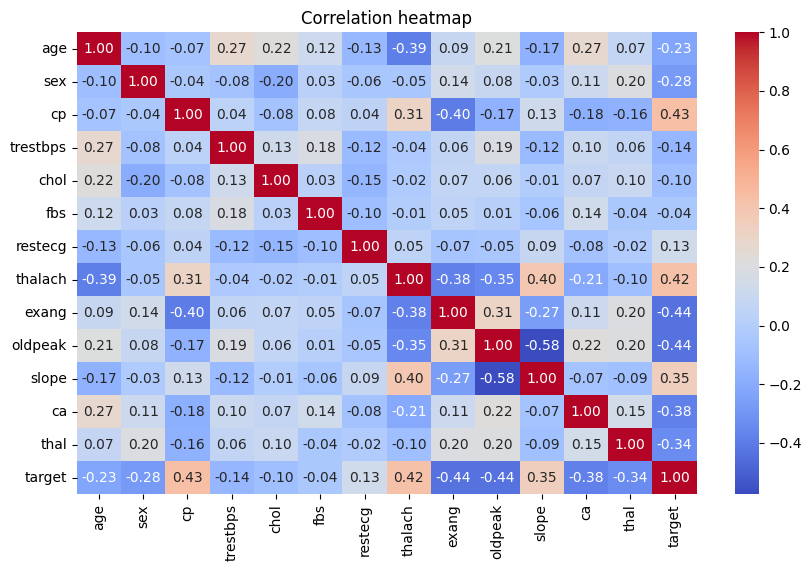

In [9]:
# visualizing relations using heatmaps
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_cols].corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation heatmap')
plt.show()

# boxplots for categorical vs numerical features
for col in categorical_cols:
  plt.figure(figsize = (10, 6))
  sns.boxplot(data[column], data[numerical_cols[0]])
  plt.title(f'Boxplot of {numerical_cols[0]} by {col}')
  plt.show()

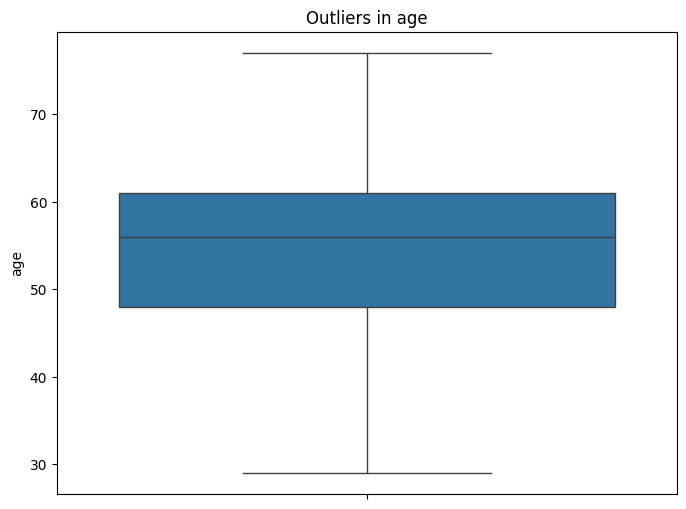

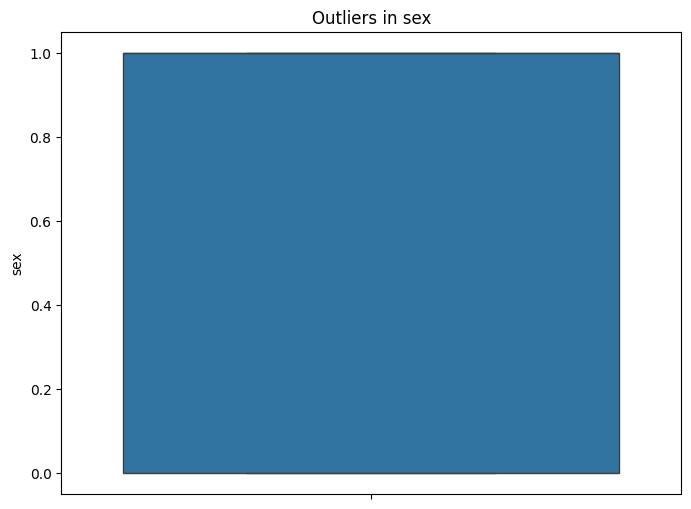

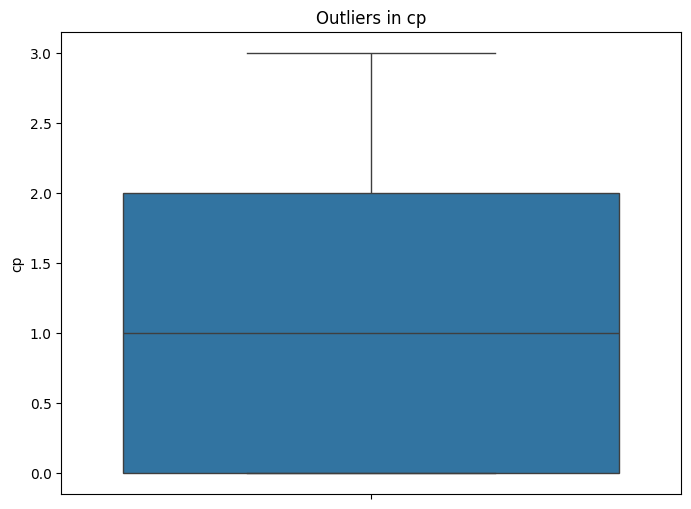

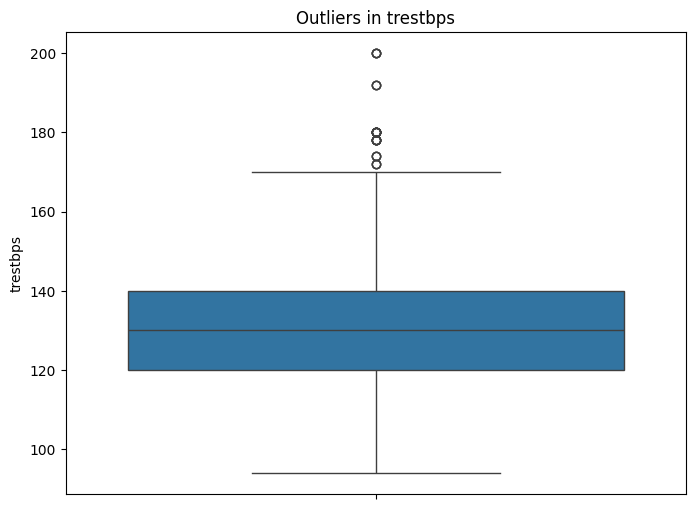

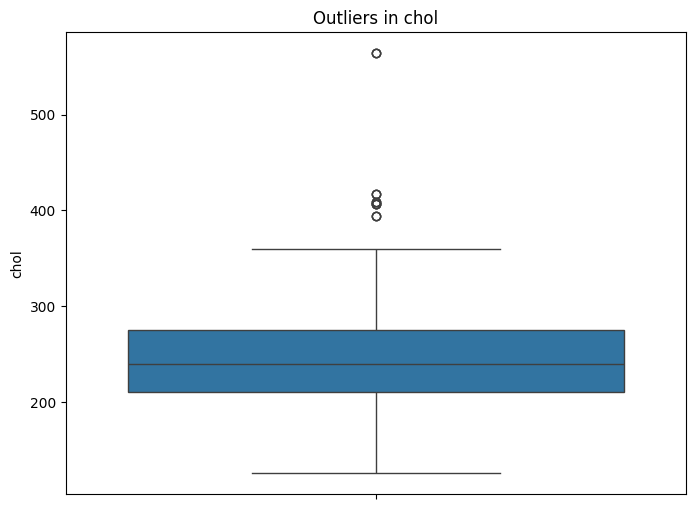

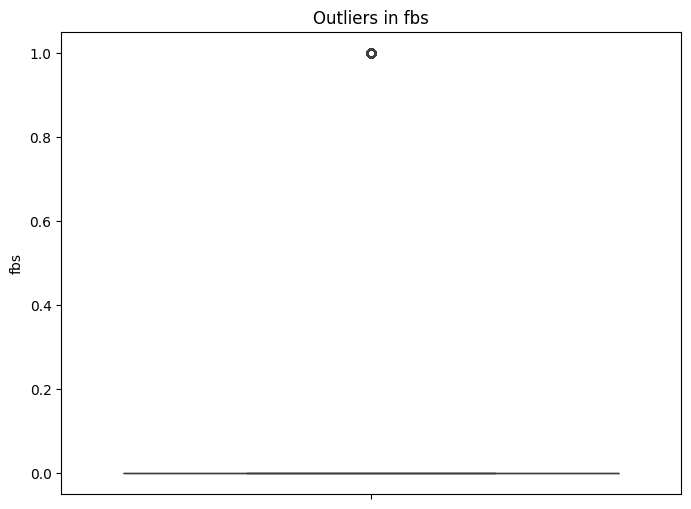

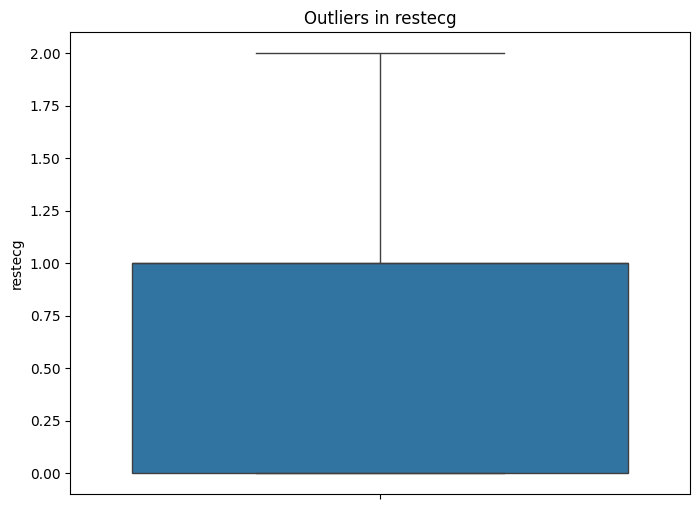

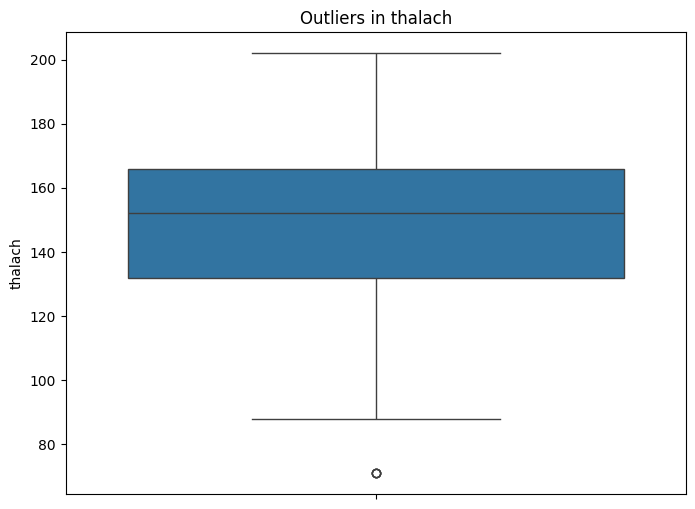

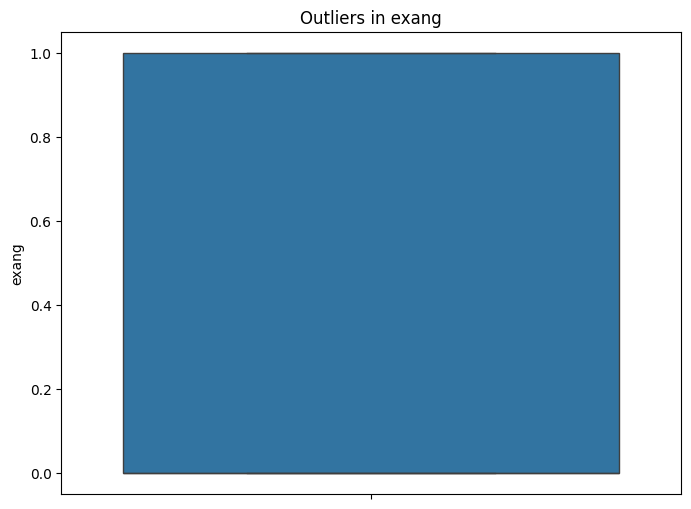

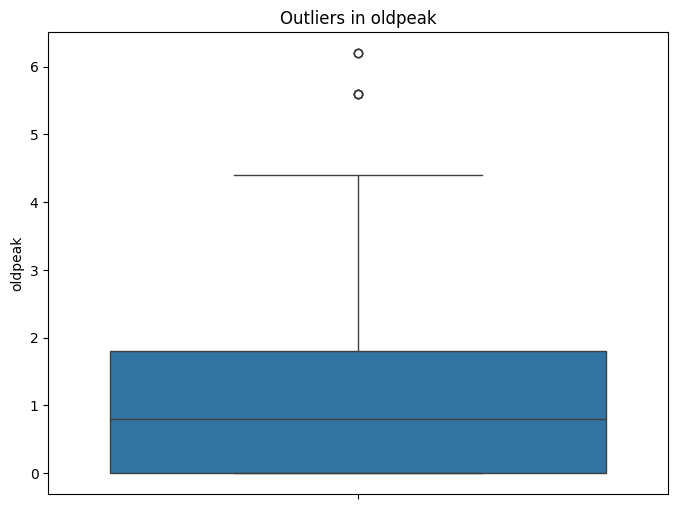

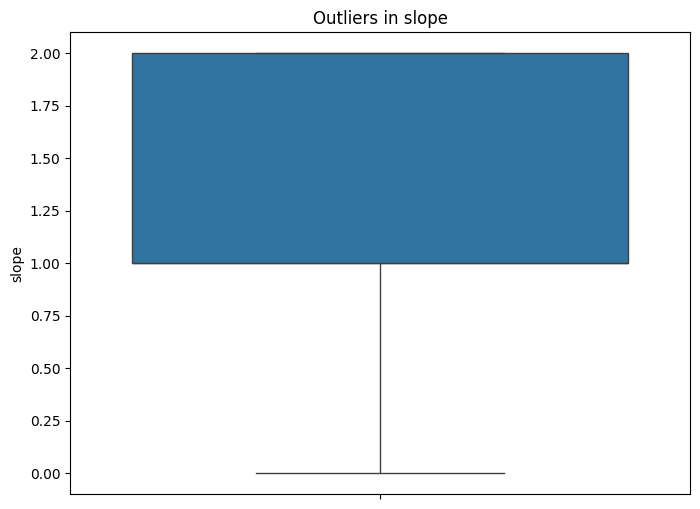

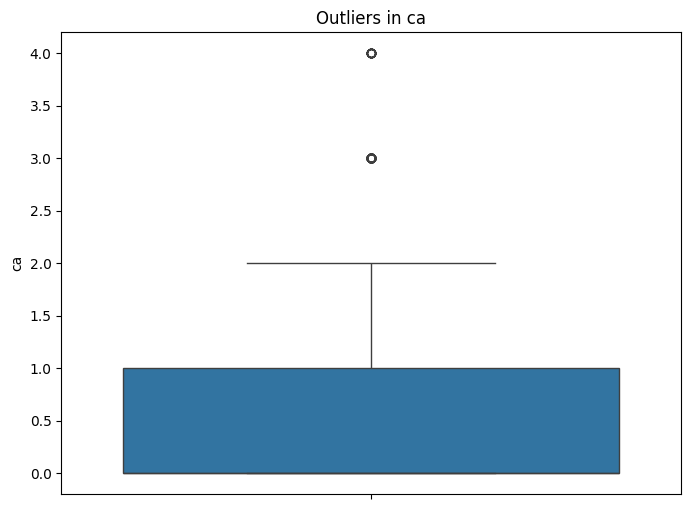

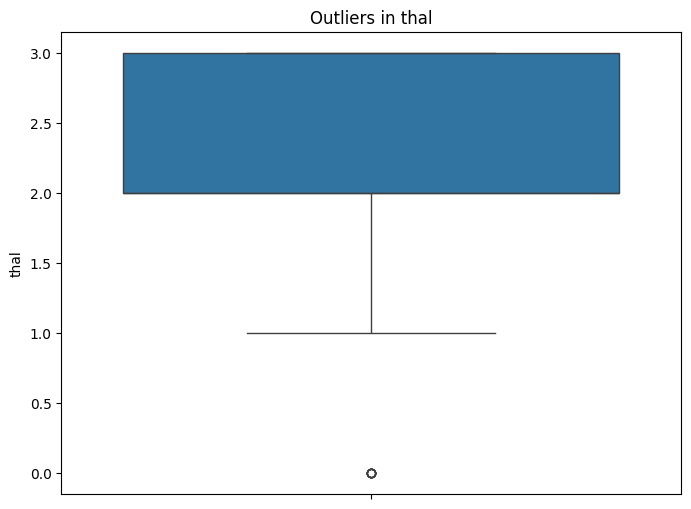

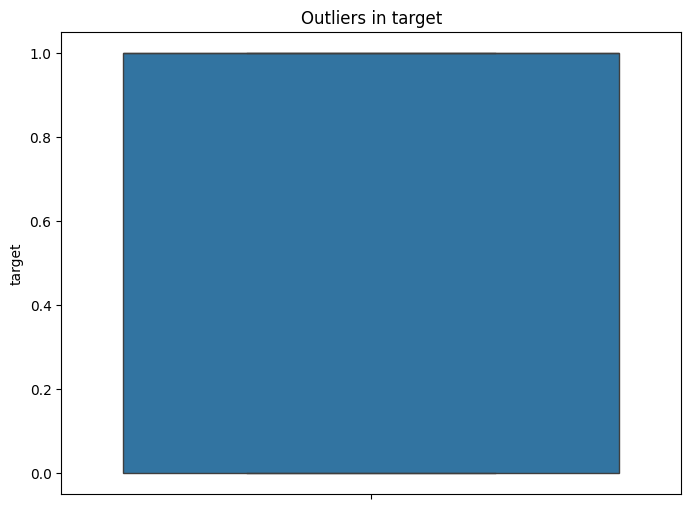

In [10]:
# detecting outliers in numerical cols
# needed to visualize which features have significant outliers that can affect the way SVM performs, and then they are handled differently.
for col in numerical_cols:
  plt.figure(figsize = (8, 6))
  sns.boxplot(data[col])
  plt.title(f'Outliers in {col}')
  plt.show()

In [28]:
# outliner treatment
for col in numerical_cols:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  data = data[(data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)]

The analysis of the data shows -
1. The data has 13 features and 1025 data points
2. All the 13 features are numerical values.
3. There are outliers in trestbps, chol, fbs, oldpeak, ca, and thal, the data was treated to remove these outliners as SVMs are sensitive to them. For this I defined the outlier as 1.5 times the interquartile range from 1st to 3rd quartiles.
4. There are no null values in the data.
5. There are no categorical values in this so no encoding is needed.

## **Classification the data using SVM**

In [11]:
class CustomSVM:
  def __init__(self, learning_rate = 0.01, lambda_param = 0.01, n_iters = 1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X, y):
    y_ = np.where(y <= 0, -1, 1)
    n_samples, n_features = X.shape
    self.w = np.zeros(n_features)
    self.b = 0

    for i in range(self.n_iters):
      for idx, x_i in enumerate(X):
        condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
        if condition:
          self.w -= self.lr * (2 * self.lambda_param * self.w)
        else:
          self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
          self.b -= self.lr * y_[idx]

  def predict(self, X):
    approx = np.dot(X, self.w) - self.b
    return np.sign(approx)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
# separate target and features
X = data.drop(columns = ['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
svm = CustomSVM(learning_rate = 0.0005, lambda_param = 0.005, n_iters = 2000)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
y_pred_svm = np.where(predictions == -1, 0, 1)
print(y_pred_svm)

[1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1
 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1
 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1
 1 1 1 0 0 1]


In [27]:
# evaluate performace
accuracy = accuracy_score(y_test, y_pred_svm)
print("Custom SVM Accuracy: ", accuracy * 100)
print("Classification Report : \n", classification_report(y_test, y_pred_svm))
print("Confussion Matrix : \n", confusion_matrix(y_test, y_pred_svm))

Custom SVM Accuracy:  87.66233766233766
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        64
           1       0.86      0.94      0.90        90

    accuracy                           0.88       154
   macro avg       0.88      0.86      0.87       154
weighted avg       0.88      0.88      0.87       154

Confussion Matrix : 
 [[50 14]
 [ 5 85]]


## **Training the neural network for classification**

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

In [29]:
# defining the nn model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [31]:
# compiling the model
model.compile(optimizer=Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6606 - loss: 0.6525 - val_accuracy: 0.8699 - val_loss: 0.2969
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8233 - loss: 0.4209 - val_accuracy: 0.8618 - val_loss: 0.2914
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8425 - loss: 0.3846 - val_accuracy: 0.8780 - val_loss: 0.2796
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8961 - loss: 0.2804 - val_accuracy: 0.8862 - val_loss: 0.3169
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8802 - loss: 0.2784 - val_accuracy: 0.9106 - val_loss: 0.2705
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8846 - loss: 0.2633 - val_accuracy: 0.9268 - val_loss: 0.3020
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9027 - loss: 0.3118 - val_accuracy: 0.9268 - val_loss: 0.2262
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9056 - loss: 0.2381 - val_accuracy: 0.8780 - 

**Evaluate the model**

In [33]:
# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Neural Network Accuracy (in percentage):", accuracy * 100)

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Neural Network Accuracy (in percentage): 97.40259740259741
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98        90

    accuracy                           0.97       154
   macro avg       0.98      0.97      0.97       154
weighted avg       0.97      0.97      0.97       154

Confusion Matrix:
 [[61  3]
 [ 1 89]]


**Make predictions on new data**

In [38]:
# Sample input data
new_data = [[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]]
new_data_df = pd.DataFrame(new_data, columns=X.columns)  # Convert to DataFrame
new_data_scaled = scaler.transform(new_data_df)          # Scale using StandardScaler

# Make prediction
prediction_nn = model.predict(new_data_scaled)
prediction_svm = svm.predict(new_data_scaled)
prediction_result_svm = np.where(prediction_svm == -1, 0, 1)[0]

# Extract and print the prediction result
prediction_result_nn = int(prediction_nn[0, 0] > 0.5)

print("Heart disease prediction (1 = yes, 0 = no):")
print("The prediction of svm model is - ", prediction_result_svm)
print("The prediction of neural network is - ", prediction_result_nn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Heart disease prediction (1 = yes, 0 = no):
The prediction of svm model is -  0
The prediction of neural network is -  0


# Chronic Kidney Disease Detection

In [62]:
# reading data from the file
file_path_k = '/content/ckd-dataset-v2.csv'
data_k = pd.read_csv(file_path_k)

**Data preprocessing and analysis**

In [5]:
print(data_k.head())

   bp (Diastolic)  bp limit             sg      al class  rbc   su  pc  pcc  \
0               0         0  1.019 - 1.021  01-Jan   ckd    0  < 0   0    0   
1               0         0  1.009 - 1.011     < 0   ckd    0  < 0   0    0   
2               0         0  1.009 - 1.011     ≥ 4   ckd    1  < 0   1    0   
3               1         1  1.009 - 1.011  03-Mar   ckd    0  < 0   0    0   
4               0         0  1.015 - 1.017     < 0   ckd    0  < 0   0    0   

   ba  ... htn dm cad appet pe ane                grf stage affected     age  
0   0  ...   0  0   0     0  0   0          ≥ 227.944    s1        1    < 12  
1   0  ...   0  0   0     0  0   0          ≥ 227.944    s1        1    < 12  
2   1  ...   0  0   0     1  0   0  127.281 - 152.446    s1        1    < 12  
3   0  ...   0  0   0     0  0   0  127.281 - 152.446    s1        1    < 12  
4   0  ...   0  1   0     1  1   0  127.281 - 152.446    s1        1  Dec-20  

[5 rows x 29 columns]


In [6]:
print(data_k.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  200 non-null    int64 
 1   bp limit        200 non-null    int64 
 2   sg              200 non-null    object
 3   al              200 non-null    object
 4   class           200 non-null    object
 5   rbc             200 non-null    int64 
 6   su              200 non-null    object
 7   pc              200 non-null    int64 
 8   pcc             200 non-null    int64 
 9   ba              200 non-null    int64 
 10  bgr             200 non-null    object
 11  bu              200 non-null    object
 12  sod             200 non-null    object
 13  sc              200 non-null    object
 14  pot             200 non-null    object
 15  hemo            200 non-null    object
 16  pcv             200 non-null    object
 17  rbcc            200 non-null    object
 18  wbcc      

In [7]:
row, col = data_k.shape
print(row, col)

200 29


In [8]:
print(data_k.describe)

<bound method NDFrame.describe of      bp (Diastolic)  bp limit             sg      al   class  rbc      su  pc  \
0                 0         0  1.019 - 1.021  01-Jan     ckd    0     < 0   0   
1                 0         0  1.009 - 1.011     < 0     ckd    0     < 0   0   
2                 0         0  1.009 - 1.011     ≥ 4     ckd    1     < 0   1   
3                 1         1  1.009 - 1.011  03-Mar     ckd    0     < 0   0   
4                 0         0  1.015 - 1.017     < 0     ckd    0     < 0   0   
..              ...       ...            ...     ...     ...  ...     ...  ..   
195               1         2  1.019 - 1.021     < 0     ckd    0     < 0   0   
196               0         0  1.019 - 1.021     < 0     ckd    0     < 0   0   
197               1         1        ≥ 1.023     < 0  notckd    0     < 0   0   
198               1         1        ≥ 1.023     < 0  notckd    0     < 0   0   
199               1         1  1.009 - 1.011  02-Feb     ckd    0  02-Feb  

In [63]:
# Separate categorical and numerical columns
categorical_columns = data_k.select_dtypes(include=['object']).columns
numerical_columns = data_k.select_dtypes(include=[np.number]).columns

print("The categorical values in the data are - ")
print("The number of features which are categorical are - ", len(categorical_columns))
print(categorical_columns)

print("The numerical values in the data are - ")
print("The number of features which are numerical are - ", len(numerical_columns))
print(numerical_columns)

# Frequency count for categorical columns
for column in categorical_columns:
    print(f'Value counts for {column}:\n', data_k[column].value_counts())
    print('\n')

The categorical values in the data are - 
The number of features which are categorical are -  16
Index(['sg', 'al', 'class', 'su', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo',
       'pcv', 'rbcc', 'wbcc', 'grf', 'stage', 'age'],
      dtype='object')
The numerical values in the data are - 
The number of features which are numerical are -  13
Index(['bp (Diastolic)', 'bp limit', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'affected'],
      dtype='object')
Value counts for sg:
 sg
1.019 - 1.021    75
1.009 - 1.011    45
≥ 1.023          41
1.015 - 1.017    36
< 1.007           3
Name: count, dtype: int64


Value counts for al:
 al
< 0       116
02-Feb     27
03-Mar     23
01-Jan     21
≥ 4        13
Name: count, dtype: int64


Value counts for class:
 class
ckd       128
notckd     72
Name: count, dtype: int64


Value counts for su:
 su
< 0       170
02-Feb      9
03-Apr      8
04-Apr      6
01-Feb      6
≥ 4         1
Name: count, dtype: int64


Value counts

In [65]:
# data encoding and handling missing values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# encoding the binary cols with 0 and 1
#binary_cols = ['pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
#for col in binary_cols:
#  data_k[col] = data_k[col].map({'yes' : 1, 'no' : 0, 'good' : 1, 'poor' : 0, 'normal' : 1, 'abnormal' : 0})

# encoding multi-level categorical variables as numeric
label_cols = ['stage', 'class', 'bp (Diastolic)', 'bp limit', 'sg', 'al', 'su']
for col in label_cols:
  le = LabelEncoder()
  data_k[col] = le.fit_transform(data_k[col].astype(str))

In [66]:
print(data_k.head())

   bp (Diastolic)  bp limit  sg  al  class  rbc  su  pc  pcc  ba  ... htn dm  \
0               0         0   2   0      0    0   4   0    0   0  ...   0  0   
1               0         0   0   3      0    0   4   0    0   0  ...   0  0   
2               0         0   0   4      0    1   4   1    0   1  ...   0  0   
3               1         1   0   2      0    0   4   0    0   0  ...   0  0   
4               0         0   1   3      0    0   4   0    0   0  ...   0  1   

  cad appet pe ane                grf stage affected     age  
0   0     0  0   0          ≥ 227.944     0        1    < 12  
1   0     0  0   0          ≥ 227.944     0        1    < 12  
2   0     1  0   0  127.281 - 152.446     0        1    < 12  
3   0     0  0   0  127.281 - 152.446     0        1    < 12  
4   0     1  1   0  127.281 - 152.446     0        1  Dec-20  

[5 rows x 29 columns]


In [67]:
# Checking for non-numeric columns still remaing after the encoding
non_numeric_cols = data_k.select_dtypes(include=['object']).columns
print("Columns with non-numeric values:", non_numeric_cols)

# Display unique values in each non-numeric column for inspection
for col in non_numeric_cols:
    print(f"Unique values in '{col}': {data_k[col].unique()}")

Columns with non-numeric values: Index(['bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'grf',
       'age'],
      dtype='object')
Unique values in 'bgr': ['< 112' '112 - 154' '154 - 196' '406 - 448' '238 - 280' '196 - 238'
 '≥ 448' '280 - 322' '364 - 406' '322 - 364']
Unique values in 'bu': ['< 48.1' '48.1 - 86.2' '200.5 - 238.6' '124.3 - 162.4' '86.2 - 124.3'
 '162.4 - 200.5' '≥ 352.9' '238.6 - 276.7']
Unique values in 'sod': ['138 - 143' '133 - 138' '123 - 128' '143 - 148' '148 - 153' '< 118'
 '128 - 133' '118 - 123' '≥ 158']
Unique values in 'sc': ['< 3.65' '3.65 - 6.8' '16.25 - 19.4' '6.8 - 9.95' '13.1 - 16.25'
 '9.95 - 13.1' '≥ 28.85']
Unique values in 'pot': ['< 7.31' '≥ 42.59' '7.31 - 11.72' '38.18 - 42.59']
Unique values in 'hemo': ['11.3 - 12.6' '8.7 - 10' '13.9 - 15.2' '≥ 16.5' '10 - 11.3' '7.4 - 8.7'
 '12.6 - 13.9' '15.2 - 16.5' '< 6.1' '6.1 - 7.4']
Unique values in 'pcv': ['33.5 - 37.4' '29.6 - 33.5' '41.3 - 45.2' '37.4 - 41.3' '≥ 49.1'
 '21.8 - 25.7' '45.

In [68]:
# observe that there are range values and non-numeric labels still in several cols
# convert the ranges into numerical values by replacing each range with midpoint of interval
# remove non-numeric labels like "discrete", "meta" and "class" with NaN

def range_to_midpoint(value):
    if isinstance(value, str):
        # Handle age specifically
        if value == 'Dec-20':
            return np.nan
        elif value != 'Dec-20' and '-' in value:
            parts = value.split('-')
            return (float(parts[0]) + float(parts[1])) / 2
        elif '<' in value or '≥' in value:
            return float(value.replace('<', '').replace('≥', ''))  # Fixed boundary value
        elif value in ["discrete", "meta", "class", " p "]:
            return np.nan
    return float(value)

# Apply the function to each problematic column
non_numeric_columns = ['sc', 'grf', 'age', 'bgr', 'bu', 'sod', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc']
for col in non_numeric_columns:
  data_k[col] = data_k[col].apply(range_to_midpoint)
#data_k['affected'] = data_k['affected'].apply(lambda x: 1 if x == '1' else (0 if x == '0' else np.nan))

In [69]:
# check again for any non-numeric value -
non_numeric_cols = data_k.select_dtypes(include=['object']).columns
print("Remaining non-numeric columns:", non_numeric_cols)

Remaining non-numeric columns: Index([], dtype='object')


In [70]:
# handle missing values

# numeric type cols will be filled with the median
numeric_like_cols = ['sg', 'al', 'su']
for col in numeric_like_cols:
  data_k[col] = data_k[col].fillna(data_k[col].median())

# in categorical values missing values is filled with the mode
categorical_cols_k = list(set(data_k.columns) - set(numeric_like_cols))
#print(categorical_cols_k)
for col in categorical_cols_k:
    if not data_k[col].isnull().all():  # Check if the column is not entirely NaN
        mode_value = data_k[col].mode()
        if not mode_value.empty:  # Check if mode is not empty
            data_k[col] = data_k[col].fillna(mode_value[0])  # Fill with the mode
        else:
            print(f"Warning: Column '{col}' has no mode value to fill NaNs.")
    else:
        print(f"Warning: Column '{col}' is entirely NaN and cannot fill NaNs with mode.")

knn_imputer = KNNImputer(n_neighbors = 5)

# adjust cols as needed for physiological like data
physiological_cols = ['bp (Diastolic)', 'bgr', 'bu', 'sod', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc']

#replace non-numeric entries like discrete with NaN
data_k[physiological_cols] = data_k[physiological_cols].apply(pd.to_numeric, errors='coerce')
data_k[physiological_cols] = knn_imputer.fit_transform(data_k[physiological_cols])

#normalize numeric like cols
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_k[numeric_like_cols] = scaler.fit_transform(data_k[numeric_like_cols])


In [71]:
print(data_k.head())

   bp (Diastolic)  bp limit    sg    al  class  rbc   su  pc  pcc  ba  ...  \
0             0.0         0  0.50  0.00      0    0  0.8   0    0   0  ...   
1             0.0         0  0.00  0.75      0    0  0.8   0    0   0  ...   
2             0.0         0  0.00  1.00      0    1  0.8   1    0   1  ...   
3             1.0         1  0.00  0.50      0    0  0.8   0    0   0  ...   
4             0.0         0  0.25  0.75      0    0  0.8   0    0   0  ...   

   htn  dm  cad  appet  pe  ane       grf  stage  affected   age  
0    0   0    0      0   0    0  227.9440      0         1  12.0  
1    0   0    0      0   0    0  227.9440      0         1  12.0  
2    0   0    0      1   0    0  139.8635      0         1  12.0  
3    0   0    0      0   0    0  139.8635      0         1  12.0  
4    0   1    0      1   1    0  139.8635      0         1  62.5  

[5 rows x 29 columns]


In [72]:
print(data_k.isnull().sum())

bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
age               0
dtype: int64


In [73]:
from sklearn.preprocessing import StandardScaler
X = data_k.drop('class', axis = 1)
y = data_k['class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
def detect_outliers_iqr(data):
  outliers = {}
  for col in data.select_dtypes(include = [np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
  return outliers

outliers_iqr = detect_outliers_iqr(data_k)
outliers_iqr

{'bp (Diastolic)': Series([], Name: bp (Diastolic), dtype: float64),
 'bp limit': Series([], Name: bp limit, dtype: int64),
 'sg': 5      1.0
 8      1.0
 10     1.0
 11     1.0
 14     1.0
 21     1.0
 22     1.0
 23     1.0
 24     1.0
 27     1.0
 28     1.0
 29     1.0
 33     1.0
 36     1.0
 40     1.0
 44     1.0
 48     1.0
 52     1.0
 55     1.0
 63     1.0
 66     1.0
 67     1.0
 80     1.0
 84     1.0
 88     1.0
 93     1.0
 100    1.0
 102    1.0
 115    1.0
 124    1.0
 130    1.0
 132    1.0
 134    1.0
 153    1.0
 154    1.0
 158    1.0
 172    1.0
 177    1.0
 182    1.0
 197    1.0
 198    1.0
 Name: sg, dtype: float64,
 'al': 0      0.0
 23     0.0
 47     0.0
 56     0.0
 57     0.0
 72     0.0
 86     0.0
 93     0.0
 94     0.0
 112    0.0
 117    0.0
 126    0.0
 135    0.0
 149    0.0
 155    0.0
 156    0.0
 157    0.0
 169    0.0
 182    0.0
 183    0.0
 193    0.0
 Name: al, dtype: float64,
 'class': Series([], Name: class, dtype: int64),
 'rbc': 2      1


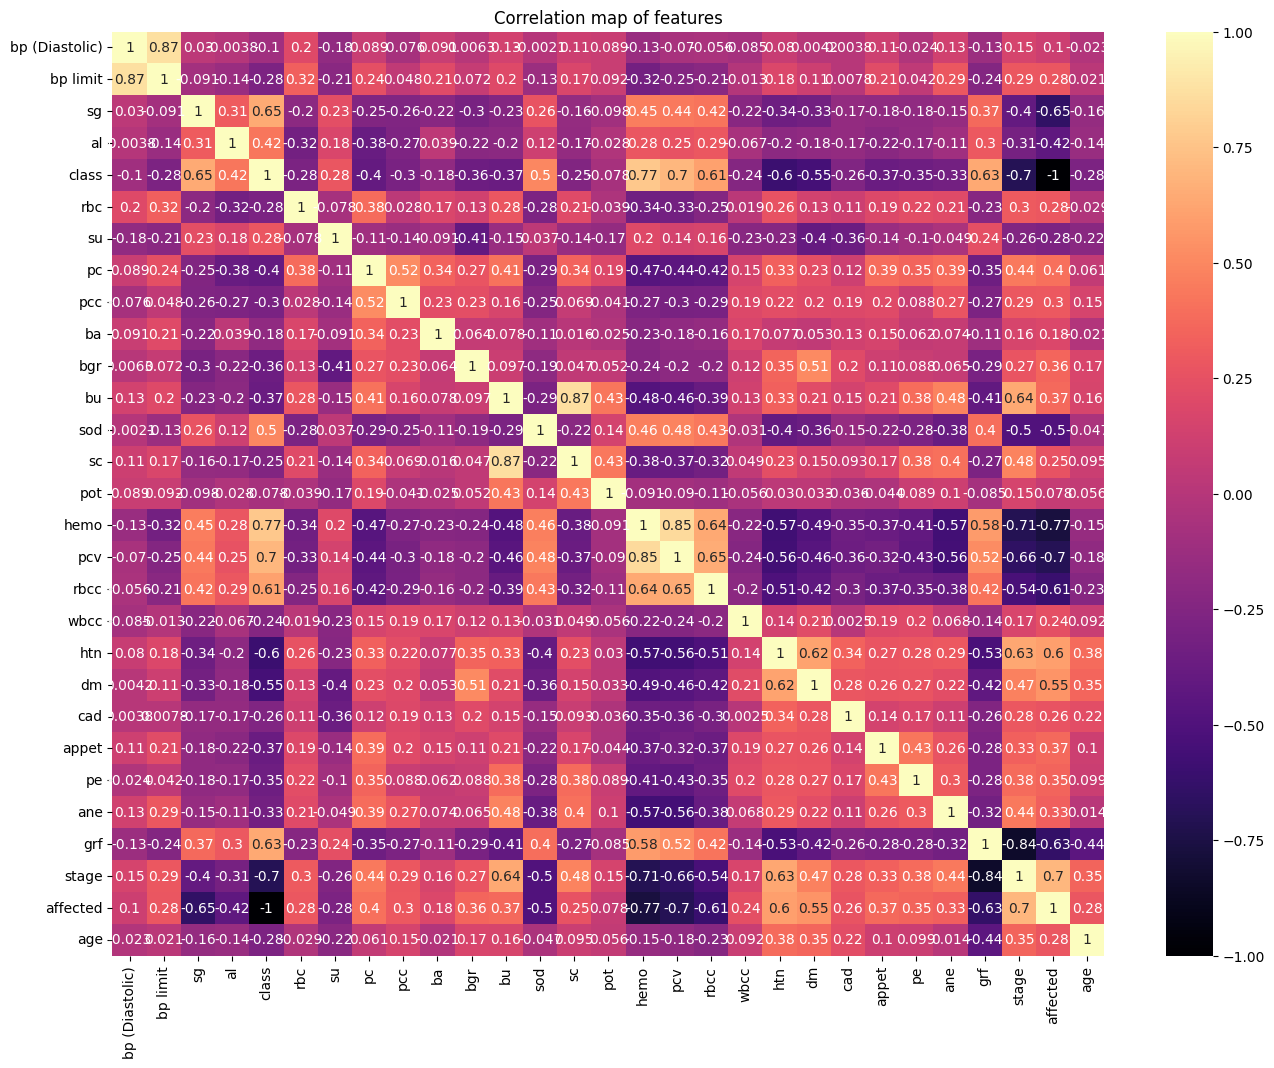

In [49]:
# creating heatmap to recognize correlations
plt.figure(figsize = (16, 12))
sns.heatmap(data_k.corr(), annot = True, cmap = "magma", center = 0)
plt.title("Correlation map of features")
plt.show()

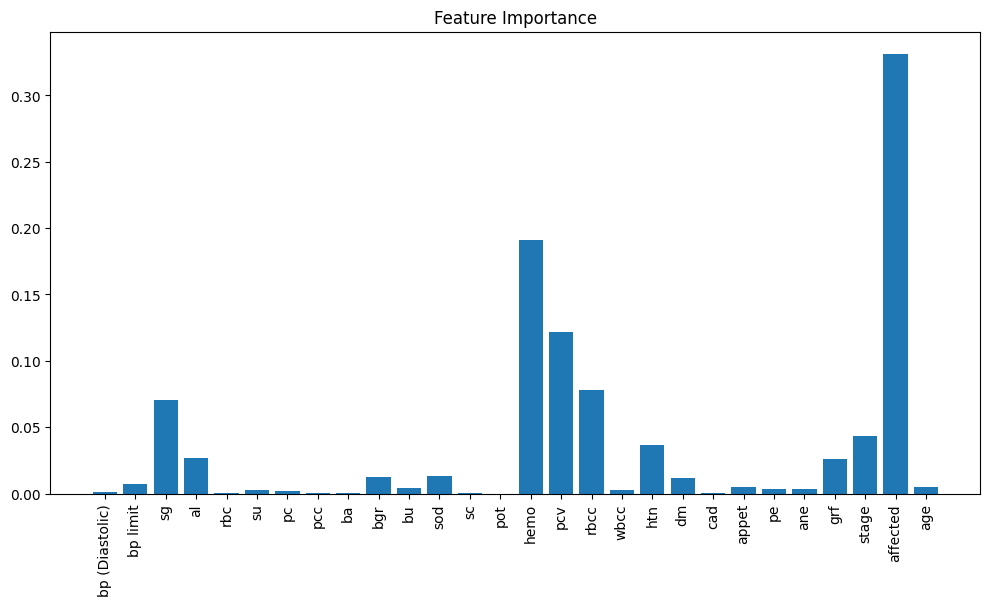

In [50]:
# since there are many features, we will check the importance of each feature and apply PCA
from sklearn.ensemble import RandomForestClassifier
model_feature = RandomForestClassifier()
model_feature.fit(X, y)
feature_importances = model_feature.feature_importances_

# plot the feature importances
plt.figure(figsize = (12, 6))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation = 90)
plt.title("Feature Importance")
plt.show()

From all the data preprocesing the information gathered is -
1. The data consisted of 200 data points with 28 features.
2. There are 16 categorical and 13 numerical features.
3. The categorical features are encoded into numerical values for applying ML models. The non-numeric symbols, ranges and titles are also encoded.
4. Then the missing values are handled, by filling the missing cols with median of the data
5. The outliers in the data are identified using IQR outlier detection method where unusually low and high values are flagged.
Cols like - bp, bp limit, hemo, pcv, htn, dm, stage and affected are free of any outliers.
Then there are non - empty series of outliers -
  *   'sg': The values detected as outliers (e.g., 5: 1.0, 8: 1.0, ...) are all 1.0, appearing across multiple indices.
  *   'al': Detected outliers in this column all have a value of 0.0.
  *   'rbc', 'pc', 'pcc', 'ba': These columns show outlier indices primarily with the value 1.
  *   'bu', 'sc', 'sod', 'pot', 'rbcc', 'wbcc': These columns include continuous values, which are likely flagged as outliers based on their significant deviation from the column's typical value range.

  Then there are mixed outliers like the age col which shows outliers with values like 12.0 and 23.5, possibly indicating that these values are abnormally low or high relative to the rest of the dataset.


  
  
  

In [75]:
# since there are many features which can increase noise and overfitting
from sklearn.decomposition import PCA
n_components = 14
pca = PCA(n_components = n_components)
X = pca.fit_transform(X)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_.sum()}")

Explained Variance Ratio: 0.9999998681399392


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.96      0.98        24

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[36  0]
 [ 1 23]]
Accuracy: 0.9833333333333333


In [77]:
# Now implement Random Forest on own rather than using the pre-trained model
from collections import Counter
from sklearn.tree import DecisionTreeClassifier

class RandomForest:
  def __init__(self, n_estimators = 10, max_depth = None, max_features = 'sqrt'):
    self.n_estimators = n_estimators
    self.max_depth = max_depth
    self.max_features = max_features
    self.trees = []

  def bootstrap_sample(self, X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, n_samples, replace =True)
    return X[indices], y[indices]

  def fit(self, X, y):
    X = np.array(X)
    y = np.array(y)
    self.trees = []
    for i in range(self.n_estimators):
      tree = DecisionTreeClassifier(max_depth = self.max_depth, max_features = self.max_features)
      X_sample, y_sample = self.bootstrap_sample(X, y)
      tree.fit(X_sample, y_sample)
      self.trees.append(tree)

  def predict(self, X):
    tree_predictions = np.array([tree.predict(X) for tree in self.trees])
    return np.array([Counter(tree_predictions[:, i]).most_common(1)[0][0] for i in range(X.shape[0])])

  def score(self, X, y):
    predictions = self.predict(X)
    return np.mean(predictions == y)

model_rf = RandomForest(n_estimators = 10, max_depth = 10)
model_rf.fit(X_train, y_train)

train_accuracy = model_rf.score(X_train, y_train)
test_accuracy = model_rf.score(X_test, y_test)

print(f"Training accuracy : {train_accuracy}")
print(f"Test accuracy : {test_accuracy}")

y_pred = model_rf.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Training accuracy : 1.0
Test accuracy : 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.92      0.96        24

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

